# Non Linear Regression Analysis to fit the datapoints corresponding to China´s GDP from 1960 to 2014


## Objectives

After completing this lab you will be able to:

-   Differentiate between Linear and non-linear regression
-   Use Non-linear regression model in Python


If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies, linear regression presumes that the data is linear. 
In this notebook, we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.


<h2 id="importing_libraries">Importing required libraries</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Though Linear regression is very good to solve many problems, it cannot be used for all datasets. First recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x.

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear.


<a id="ref2"></a>

# Non-Linear Regression


We're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We imported a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 


In [2]:
#Reading dataset

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.


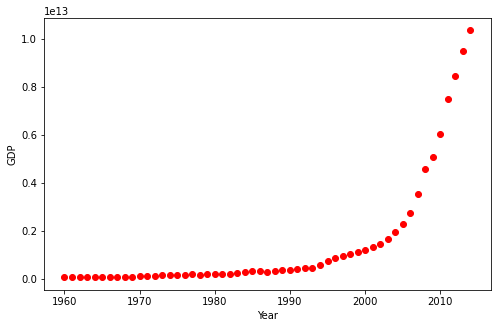

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


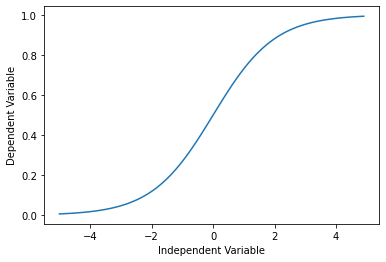

In [4]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters. 


In [5]:
#Creating sigmoid function

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:


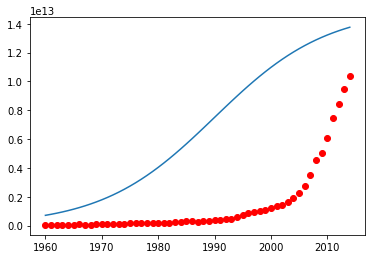

In [6]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:


In [7]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.


In [8]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


Now we plot our resulting regression model.


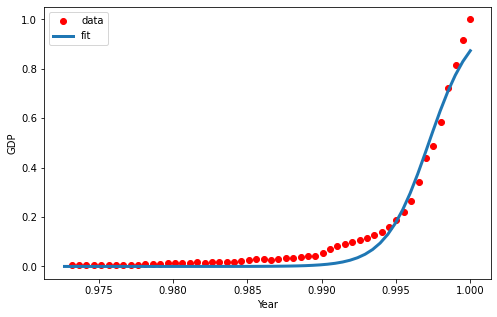

In [9]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Evaluation

Calculation of the accuracy of our model by training it and testing the Sigmoid function.


In [10]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)
print(popt)
# evaluation
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

[730.13197866   0.99714973]
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.94


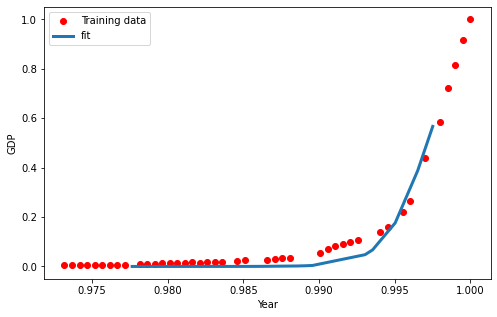

In [11]:
plt.figure(figsize=(8,5))
plt.plot(train_x, train_y, 'ro', label='Training data')
plt.plot(test_x,y_hat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Evaluation of the model with new GDP data from 2014-2019

We know the GDP value is influenced by the economic situation of a country and there are many variables involved that can affect its behavior, hence we are going to try to use the model to predict China's GDP values from the years 2014 to 2019 and see how they compare with actual values, assuming the country continue with the same growing trend. 

In [12]:
# importing data
df2 = pd.read_csv("china_gdp_2014-2019.csv")
df2.head(6)

,Year,Value
0,2014,1.040000e+13
1,2015,1.110000e+13
2,2016,1.120000e+13
3,2017,1.230000e+13
4,2018,1.390000e+13
5,2019,1.430000e+13


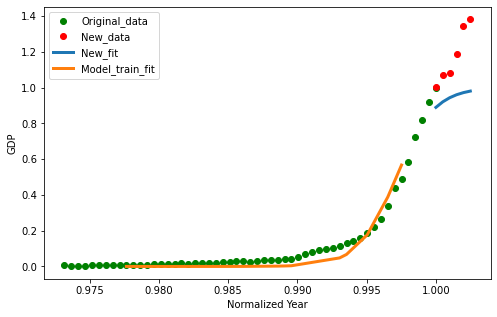

In [13]:
# Defining varaibles
x_data2, y_data2 = (df2["Year"].values, df2["Value"].values)

# Normalazing
xdata2 =x_data2/max(x_data)
ydata2 =y_data2/max(y_data)

# predict using test set
y_pred = sigmoid(xdata2, *popt)
#Plotting
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'go', label='Original_data')
plt.plot(xdata2, ydata2, 'ro', label='New_data')
plt.plot(xdata2,y_pred, linewidth=3.0, label='New_fit')
plt.plot(test_x,y_hat, linewidth=3.0, label='Model_train_fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Normalized Year')
plt.show()


## Accuracy evaluation of the new data from 2014-2019

In [14]:
print('Real "y" values:', ydata2)
print('Predicted "y" values:', y_pred)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - ydata2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - ydata2) ** 2))
print("R2-score: %.2f" % r2_score(ydata2, y_pred) )

Real "y" values: [1.00436205 1.07196334 1.08162067 1.18785127 1.34236851 1.38099782]
Predicted "y" values: [0.88904994 0.92009228 0.94300617 0.95963764 0.97156221 0.9800371 ]
Mean absolute error: 0.23
Residual sum of squares (MSE): 0.07
R2-score: -2.41


## Conclusion

* The Non-Linear Original Model resulted with a good accuracy, with a R-Score = 0.94 and a MSE= 0.
* Using the model to predict future values of GDP between 2014-2019, resulted in a low accuracy, R-Score = -2.41, meaning that our model can only be used to calculate GDP values between the range of years 1960-2014 in the dataset and not for future values.
* This discrepancy in the model when we use years beyond 2014 to calculate the GDP could obey to the unpredictible nature of this variable with time. However, more adjustments can be done to improve the accuracy of the model and get better results with prediction with years beyond 2014.

# Author: Hiram Mata
